<a href="https://colab.research.google.com/github/JackCharlesZhang/GermanSentimentAnalysisR3/blob/main/R3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U textblob-de
!python -m textblob.download_corpora
from textblob_de import TextBlobDE as TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

df = pd.read_csv('datetweet.csv', on_bad_lines='skip', sep='\t')
df_tweets = df[['date','tweet']]

def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Removing @mentions
  text = re.sub(r'#', '', text) # Removing hashtag symbol
  text = re.sub(r'RT[\s]+', '', text) # Removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyper link
  return text

df_tweets['tweet'] = df_tweets['tweet'].apply(cleanText)

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df_tweets['Subjectivity'] = df_tweets['tweet'].apply(getSubjectivity)
df_tweets['Polarity'] = df_tweets['tweet'].apply(getPolarity)

df_tweets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


KeyError: ignored

In [ ]:
 allWords = ' '.join( [twts for twts in df_tweets['tweet']])

wordCloud = WordCloud(width = 500, height = 300, stopwords = [], random_state = 21, max_font_size = 119,
                                                              background_color="white", scale=2.0).generate(allWords)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/drive')
df_tweets.to_csv('/drive/My Drive/2011to2022.csv')

In [ ]:
describe = df_tweets.describe()
describe

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/sentimentanalysiswithtime.csv')

display(data.head())

,Unnamed: 0,date,tweet,Subjectivity,Polarity
0,5473,3/23/2011,Martin Lindner von der FDP im Chat zu zdflogin...,0.0,0.233333
1,5472,3/24/2011,War das grad Atomenergie Unterstützung? rammst...,0.0,0.000000
2,5468,3/25/2011,"Alkohol und Atomkraft, befürchte, von beiden k...",0.0,0.000000
3,5469,3/25/2011,Wie man politische Themen beliebig macht (I): ...,0.0,0.000000
4,5470,3/25/2011,Wer meint ein Restrisiko in der Atomkraft sei ...,0.0,1.000000


Text(0, 0.5, 'Sentiment')

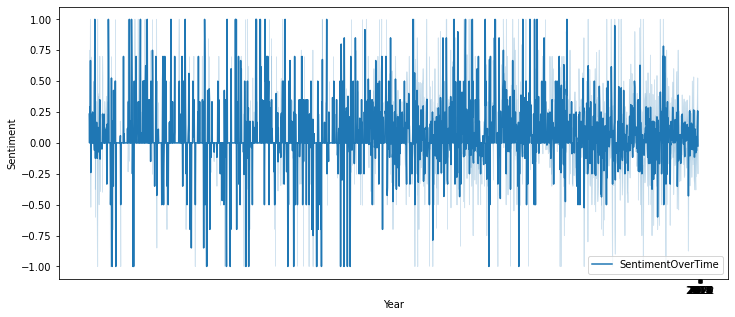

In [ ]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'date',
             y = 'Polarity',
             data = data,
             label = 'SentimentOverTime')
  
plt.xlabel( 'Year')
  
# setting customized ticklabels for x axis
pos = [ '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', 
       '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
       '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']
  
lab = [ '2011', '2012', '2013', '2014', '2015', '2016', 
       '2017', '2018', '2019', '2020', '2021', '2022']
  
plt.xticks( pos, lab)
  
plt.ylabel('Sentiment')

In [ ]:
# computing a 14 tweet rolling average
data[ '14tweet_rolling_avg' ] = data.Polarity.rolling(14).mean()
  
# viewing the dataset
display(data.head(20))

,Unnamed: 0,date,tweet,Subjectivity,Polarity,14tweet_rolling_avg
0,5473,3/23/2011,Martin Lindner von der FDP im Chat zu zdflogin...,0.000000,0.233333,NaN
1,5472,3/24/2011,War das grad Atomenergie Unterstützung? rammst...,0.000000,0.000000,NaN
2,5468,3/25/2011,"Alkohol und Atomkraft, befürchte, von beiden k...",0.000000,0.000000,NaN
3,5469,3/25/2011,Wie man politische Themen beliebig macht (I): ...,0.000000,0.000000,NaN
4,5470,3/25/2011,Wer meint ein Restrisiko in der Atomkraft sei ...,0.000000,1.000000,NaN
5,5471,3/25/2011,Jawoll! Statt mal wirklich was gegen Atomkraft...,0.166667,0.166667,NaN
6,5453,3/26/2011,"""Wer glaubt, dass Atomkraft sicher ist, der gl...",0.000000,0.000000,NaN
7,5454,3/26/2011,Österreich hat per Volksabstimmung Atomkraft v...,0.000000,0.000000,NaN
8,5455,3/26/2011,Timewarp berlin. Allemaal mensen met atomkraft...,0.000000,0.000000,NaN
9,5456,3/26/2011,Na al dat anti-kernenergie-gedoe is een latte ...,0.000000,0.000000,NaN


In [ ]:
max(data['date'])

'9/9/2021'

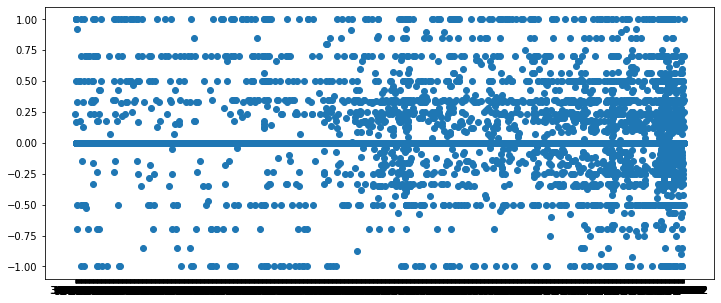

In [ ]:
plt.figure(figsize = (12, 5))
plt.scatter(x = 'date',
             y = 'Polarity',
             data = data)


In [ ]:
# set figure size
plt.figure( figsize = ( 12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot( x = 'date',
             y = 'Polarity',
             data = data,
             label = 'SentimentOverTime')

# plot using rolling average
sns.lineplot( x = 'date',
             y = '14tweet_rolling_avg',
             data = data,
             label = 'RollingAvgSentiment')

plt.xlabel( 'Year')
  
# setting customized ticklabels for x axis
pos = [ '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01', 
       '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
       '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01']
  

lab = [ '2011', '2012', '2013', '2014', '2015', '2016', 
       '2017', '2018', '2019', '2020', '2021', '2022']
  
plt.xticks( pos, lab, rotation=20)

plt.ylabel('Sentiment')

plt.show()

In [ ]:
describe_data = data.describe()
describe_data


,Unnamed: 0,Subjectivity,Polarity,14day_rolling_avg,1000tweet_rolling_avg,14tweet_rolling_avg
count,5474.000000,5473.000000,5473.000000,5447.000000,3475.000000,5275.000000
mean,2736.500000,0.050417,0.060008,0.060038,0.067691,0.061192
std,1580.352018,0.158223,0.337410,0.097593,0.015835,0.040673
min,0.000000,0.000000,-1.000000,-0.289286,0.041576,-0.058417
25%,1368.250000,0.000000,0.000000,-0.002976,0.054061,0.034599
50%,2736.500000,0.000000,0.000000,0.058036,0.063199,0.062300
75%,4104.750000,0.000000,0.175000,0.121726,0.079990,0.084449
max,5473.000000,1.000000,1.000000,0.425000,0.098712,0.173681
